<h1><font color="blue"> Random Forest and XGBoost models on data from <b>1</b> Folder of Synthetic Mass Data</font></h1>
https://synthea.mitre.org/about

The Synthetic Mass data comes in multiple folders, here we use the transformed data from a single folder of Synthetic Mass in the attempt to create a model predicting <b>Overdose</b>.

<h2>Setup token to access Project resources, will be used later to save files into the project.</h2>

In [44]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='b3d2e69a-2086-4d24-b807-348c0ee5aa23', project_access_token='p-66395c2e2a35ff15296121be26afefdae0a441f0')
pc = project.project_context


<h2>Read Transformed data stored in a Db2 table</h2>

In [3]:
import jaydebeapi, sys
import pandas as pd

#Enter the values for you database connection
dsn_database = "BLUDB"            # e.g. "BLUDB" Name of the database
dsn_hostname = "db2w-dpiyzso.us-south.db2w.cloud.ibm.com" # e.g.: "bluemix05.bluforcloud.com"
dsn_port = "50000"                # e.g. "50000" Database port number
dsn_uid = "bluadmin"        # e.g. "dash104434" User id
dsn_pwd = "uWMT_cBlss2wHSHLxJ5i_4Sj5CGH8"       # e.g. "7dBZ3jWt9xN6$o0JiX!m" User password for the database

connection_string='jdbc:db2://'+dsn_hostname+':'+dsn_port+'/'+dsn_database
if (sys.version_info >= (3,0)):
    conn = jaydebeapi.connect("com.ibm.db2.jcc.DB2Driver", connection_string, [dsn_uid, dsn_pwd])
else:
    conn = jaydebeapi.connect("com.ibm.db2.jcc.DB2Driver", [connection_string, dsn_uid, dsn_pwd])

curs = conn.cursor()
curs.execute("select * from FINAL_PATIENT_ANALYSIS")
df= pd.DataFrame(curs.fetchall())
df.head()

0  1         2  3     4    5    6    7   \
0  100d2bee-3744-46ab-abe2-768dbd82afb3  S     white  F   6.0  1.0  0.0  0.0   
1  fd38bc2b-b84d-4093-b861-8f613f71bb90  M     white  F   6.0  1.0  0.0  0.0   
2  285d1ffa-a0dd-4251-98dd-027412c297aa  M  hispanic  M   6.0  1.0  0.0  0.0   
3  16a06c54-8053-4645-9290-90818d738690  M  hispanic  F  16.0  1.0  0.0  0.0   
4  daa73978-f163-4818-b84d-6432214799f6  M     white  F   5.0  1.0  1.0  0.0   

    8    9    10   11   12    13  14  15  
0  1.0  0.0  0.0  0.0  0.0  None   0 NaN  
1  0.0  0.0  0.0  1.0  0.0  None   0 NaN  
2  0.0  0.0  0.0  1.0  0.0  None   0 NaN  
3  0.0  0.0  0.0  1.0  0.0  None   0 NaN  
4  0.0  0.0  0.0  0.0  0.0  None   0 NaN

In [4]:
column_name = curs.description[0][0]
column_name

'PATIENTID'

In [5]:
column_name_1 = curs.description[1][0]
column_name_1

'MARITAL'

<h2>Add headers to the Pandas dataframe</h2>

In [6]:
df.columns=[curs.description[0][0], curs.description[1][0], curs.description[2][0], 
            curs.description[3][0],curs.description[4][0],curs.description[5][0],
            curs.description[6][0],curs.description[7][0],curs.description[8][0],curs.description[9][0],
            curs.description[10][0],curs.description[11][0],curs.description[12][0],curs.description[13][0],
            curs.description[14][0],curs.description[15][0]
           ]

<h2>Analyze the transformed data for any cleanup needed.</h2>

In [6]:
df.head()

PATIENTID MARITAL      RACE GENDER  SICKLINESS  \
0  7487213d-8088-4b88-8280-68032edb9d39       M     white      F        17.0   
1  bc654a30-4a35-4419-93f4-e5aeb08d2ce8       M  hispanic      F         8.0   
2  368b1d02-9910-46b0-ba2e-3e035ece1f08       S     white      M        11.0   
3  3f70036a-e7ca-4a51-9fed-770e018a95e9       M     white      F        19.0   
4  4004dda0-a419-48cd-b6fe-f0ce11c8b5fb       M     white      M        11.0   

   OPIOD_PRESC  MEPERIDINE_HYDROCHLORIDE_50_MG  HYDROCODONE_BITARTRATE_5_MG  \
0          3.0                             0.0                          0.0   
1          2.0                             2.0                          0.0   
2          2.0                             0.0                          0.0   
3          2.0                             0.0                          0.0   
4          2.0                             0.0                          0.0   

   HYDROCODONE_BITARTRATE_7POINT5_MG  OXYCODONE_HYDROCHLORIDE_2POINT5_MG  \
0                                0.0                                 0.0   
1                                0.0                                 0.0   
2                                0.0                                 0.0   
3                                2.0                                 0.0   
4                                2.0                                 0.0   

   OXYCODONE_HYDROCHLORIDE_5_MG  OXYCODONE_HYDROCHLORIDE_5_MG_ORAL  \
0                           0.0                                3.0   
1                           0.0                                0.0   
2                           0.0                                2.0   
3                           0.0                                0.0   
4                           0.0                                0.0   

   OXYCODONE_HYDROCHLORIDE_15_MG REASONDESCRIPTION  DRUGOVERDOSE  DOCOUNT  
0                            0.0              None             0      NaN  
1                            0.0              None             0      NaN  
2                            0.0              None             0      NaN  
3                            0.0              None             0      NaN  
4                            0.0              None             0      NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8073 entries, 0 to 8072
Data columns (total 16 columns):
PATIENTID                             8073 non-null object
MARITAL                               8073 non-null object
RACE                                  8073 non-null object
GENDER                                8073 non-null object
SICKLINESS                            8073 non-null float64
OPIOD_PRESC                           8073 non-null float64
MEPERIDINE_HYDROCHLORIDE_50_MG        8073 non-null float64
HYDROCODONE_BITARTRATE_5_MG           8073 non-null float64
HYDROCODONE_BITARTRATE_7POINT5_MG     8073 non-null float64
OXYCODONE_HYDROCHLORIDE_2POINT5_MG    8073 non-null float64
OXYCODONE_HYDROCHLORIDE_5_MG          8073 non-null float64
OXYCODONE_HYDROCHLORIDE_5_MG_ORAL     8073 non-null float64
OXYCODONE_HYDROCHLORIDE_15_MG         8073 non-null float64
REASONDESCRIPTION                     149 non-null object
DRUGOVERDOSE                          8073 non-null int64
D

<h2>The Race column has some invalid data, which should be dropped.</h2>

In [8]:
df.RACE.unique()

array(['white', 'hispanic', 'black', 'asian', 'M', 'Unknown'],
      dtype=object)

In [7]:
import numpy as np
import seaborn as sns
%matplotlib inline

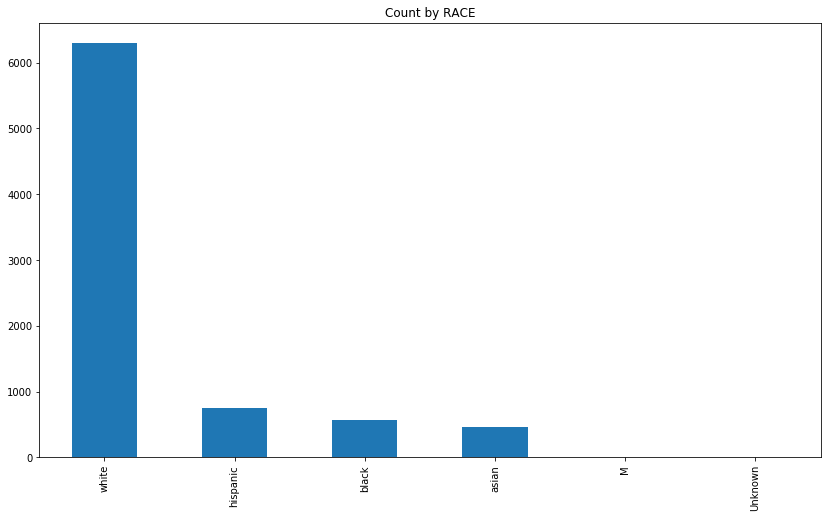

In [10]:
df['RACE'].value_counts().plot(kind='bar',figsize=(14,8),title="Count by RACE")

<h2>The Marital column has some invalid data, which should be dropped.</h2>

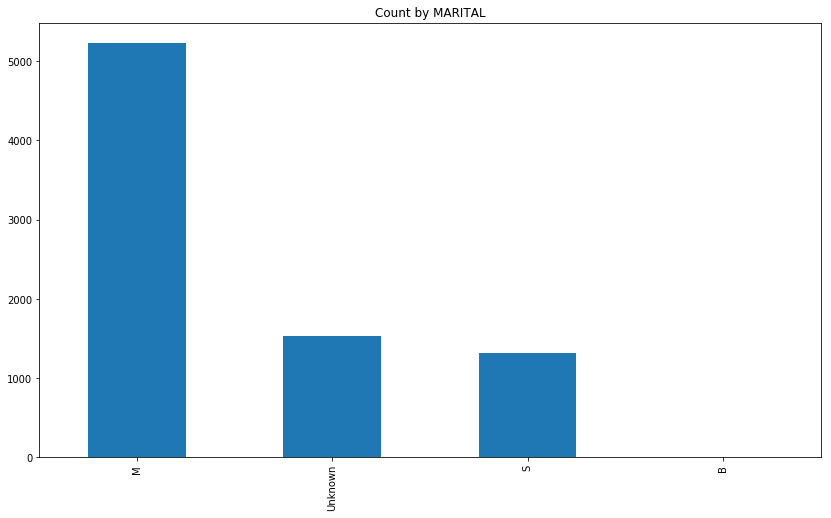

In [11]:
df['MARITAL'].value_counts().plot(kind='bar',figsize=(14,8),title="Count by MARITAL")

<h2>Analyze distribution of <b>Overdose</b> patients. The sure looks like a Skew - as most of the patients in the dataset falls into the No Overdose category (about <font color="red">98%</font>)</h2>

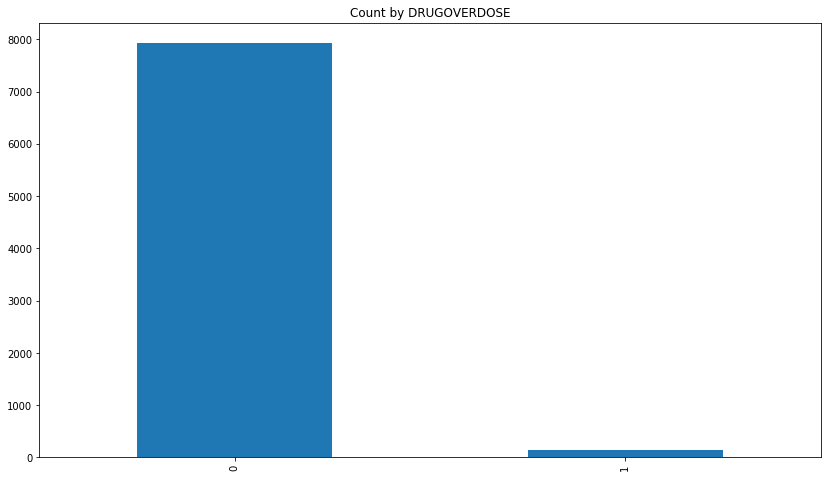

In [12]:
df['DRUGOVERDOSE'].value_counts().plot(kind='bar',figsize=(14,8),title="Count by DRUGOVERDOSE")

In [13]:
df['DRUGOVERDOSE'].value_counts()

0    7924
1     149
Name: DRUGOVERDOSE, dtype: int64

<h2>Use the <b>Pandas Profiling</b> utility to profile the dataframe.</h2>

In [1]:
!pip install pandas_profiling

     |████████████████████████████████| 133kB 18.4MB/s eta 0:00:01
     |████████████████████████████████| 614kB 25.7MB/s eta 0:00:01


  Stored in directory: /home/dsxuser/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: /home/dsxuser/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /home/dsxuser/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


In [9]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas_profiling/model/correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 0).')
  correlation_name=correlation_name, error=error
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (pro

<h2>Analyze OVERDOSE distributon by patient's Gender type.</h2>

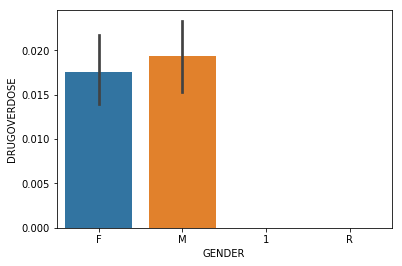

In [14]:
sns.barplot(x='GENDER',y='DRUGOVERDOSE',data=df)

<h2>The Gender column has some invalid data, which should be dropped.</h2>

In [15]:
df[(df.GENDER == '1') | (df.GENDER=='R') ]

PATIENTID  MARITAL     RACE GENDER  \
5763  8c2a2c5e-f773-4b71-a161-0ca0befeea77  Unknown        M      1   
5981  bd2f7c1d-00ea-464a-8cf4-69a6768c7d02        B  Unknown      R   

      SICKLINESS  OPIOD_PRESC  MEPERIDINE_HYDROCHLORIDE_50_MG  \
5763         5.0          1.0                             1.0   
5981        12.0          1.0                             1.0   

      HYDROCODONE_BITARTRATE_5_MG  HYDROCODONE_BITARTRATE_7POINT5_MG  \
5763                          0.0                                0.0   
5981                          0.0                                0.0   

      OXYCODONE_HYDROCHLORIDE_2POINT5_MG  OXYCODONE_HYDROCHLORIDE_5_MG  \
5763                                 0.0                           0.0   
5981                                 0.0                           0.0   

      OXYCODONE_HYDROCHLORIDE_5_MG_ORAL  OXYCODONE_HYDROCHLORIDE_15_MG  \
5763                                0.0                            0.0   
5981                                0.0                            0.0   

     REASONDESCRIPTION  DRUGOVERDOSE  DOCOUNT  
5763              None             0      NaN  
5981              None             0      NaN

In [10]:
df.count()

PATIENTID                             8073
MARITAL                               8073
RACE                                  8073
GENDER                                8073
SICKLINESS                            8073
OPIOD_PRESC                           8073
MEPERIDINE_HYDROCHLORIDE_50_MG        8073
HYDROCODONE_BITARTRATE_5_MG           8073
HYDROCODONE_BITARTRATE_7POINT5_MG     8073
OXYCODONE_HYDROCHLORIDE_2POINT5_MG    8073
OXYCODONE_HYDROCHLORIDE_5_MG          8073
OXYCODONE_HYDROCHLORIDE_5_MG_ORAL     8073
OXYCODONE_HYDROCHLORIDE_15_MG         8073
REASONDESCRIPTION                      149
DRUGOVERDOSE                          8073
DOCOUNT                                149
dtype: int64

<h2>Drop the rows with invalid Race column values.</h2>

In [11]:
new_df=df[(df['GENDER']!='1') & (df['GENDER'] != "R")]
new_df.count()

PATIENTID                             8071
MARITAL                               8071
RACE                                  8071
GENDER                                8071
SICKLINESS                            8071
OPIOD_PRESC                           8071
MEPERIDINE_HYDROCHLORIDE_50_MG        8071
HYDROCODONE_BITARTRATE_5_MG           8071
HYDROCODONE_BITARTRATE_7POINT5_MG     8071
OXYCODONE_HYDROCHLORIDE_2POINT5_MG    8071
OXYCODONE_HYDROCHLORIDE_5_MG          8071
OXYCODONE_HYDROCHLORIDE_5_MG_ORAL     8071
OXYCODONE_HYDROCHLORIDE_15_MG         8071
REASONDESCRIPTION                      149
DRUGOVERDOSE                          8071
DOCOUNT                                149
dtype: int64

In [20]:
new_df[(new_df.GENDER == '1') | (new_df.GENDER=='R') ]

Empty DataFrame
Columns: [PATIENTID, MARITAL, RACE, GENDER, SICKLINESS, OPIOD_PRESC, MEPERIDINE_HYDROCHLORIDE_50_MG, HYDROCODONE_BITARTRATE_5_MG, HYDROCODONE_BITARTRATE_7POINT5_MG, OXYCODONE_HYDROCHLORIDE_2POINT5_MG, OXYCODONE_HYDROCHLORIDE_5_MG, OXYCODONE_HYDROCHLORIDE_5_MG_ORAL, OXYCODONE_HYDROCHLORIDE_15_MG, REASONDESCRIPTION, DRUGOVERDOSE, DOCOUNT]
Index: []

<h2>Analyze OVERDOSE distributon by patient's Gender type, after dropping invalid values.</h2>

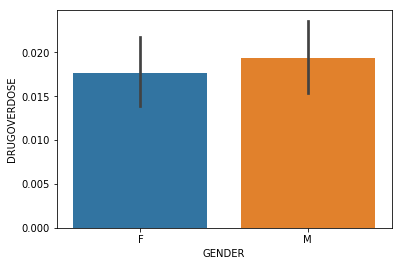

In [21]:
sns.barplot(x='GENDER',y='DRUGOVERDOSE',data=new_df)

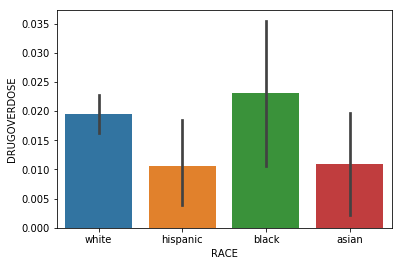

In [22]:
sns.barplot(x='RACE',y='DRUGOVERDOSE',data=new_df)

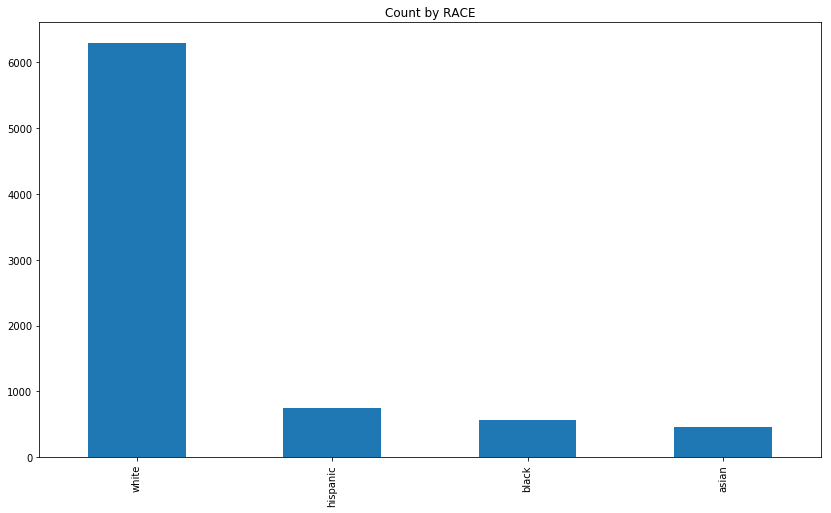

In [23]:
new_df['RACE'].value_counts().plot(kind='bar',figsize=(14,8),title="Count by RACE")

<h2>Confirm other columns have valid data.</h2>

In [24]:
new_df.RACE.unique()

array(['white', 'hispanic', 'black', 'asian'], dtype=object)

In [25]:
new_df.GENDER.unique()

array(['F', 'M'], dtype=object)

In [26]:
new_df.MARITAL.unique()

array(['M', 'S', 'Unknown'], dtype=object)

In [27]:
new_df.DRUGOVERDOSE.unique()

array([0, 1])

In [28]:
new_df['DRUGOVERDOSE'].value_counts()

0    7922
1     149
Name: DRUGOVERDOSE, dtype: int64

In [29]:
new_df.MEPERIDINE_HYDROCHLORIDE_50_MG.unique()

array([0., 2., 1., 3.])

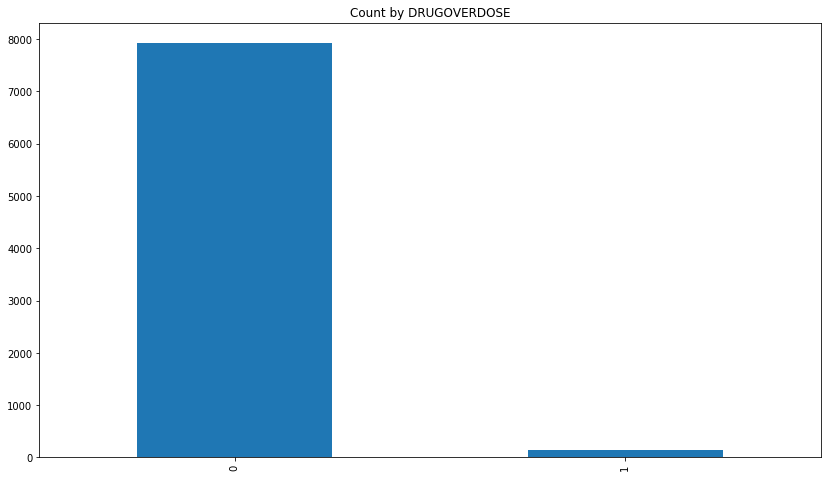

In [30]:
new_df['DRUGOVERDOSE'].value_counts().plot(kind='bar',figsize=(14,8),title="Count by DRUGOVERDOSE")

<h2>Analyze OVERDOSE distributon by patient's Sickliness.</h2>

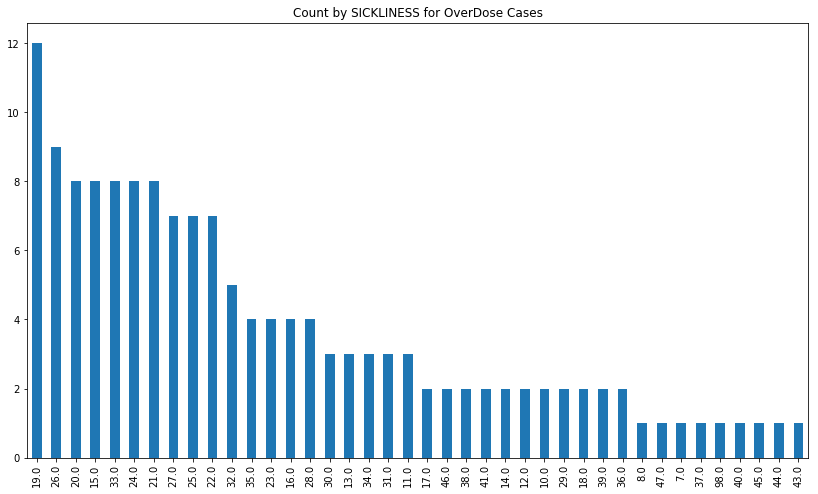

In [31]:
od_df=df[(df['DRUGOVERDOSE']==1)]
#od_df.head()
od_df['SICKLINESS'].value_counts().plot(kind='bar',figsize=(14,8),title="Count by SICKLINESS for OverDose Cases")

<h2>Analyze OVERDOSE distributon by patient's Race.</h2>

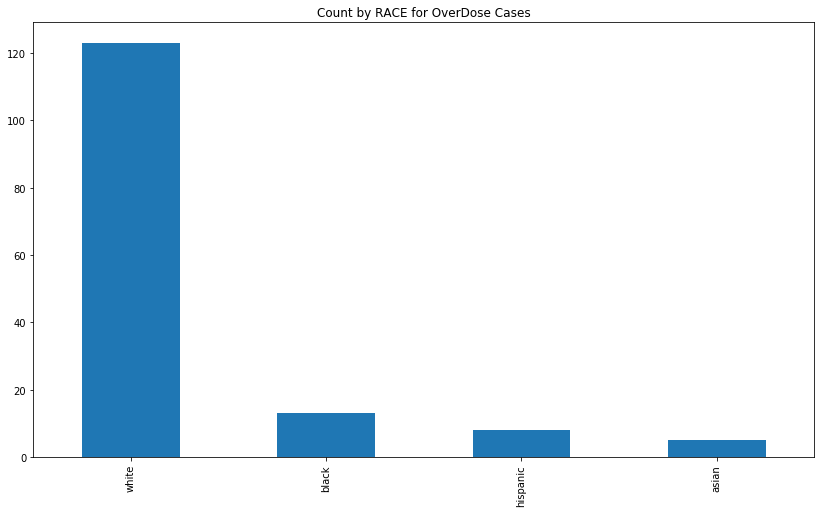

In [32]:
od_df['RACE'].value_counts().plot(kind='bar',figsize=(14,8),title="Count by RACE for OverDose Cases")

<h2>Analyze OVERDOSE distributon by patient's Martial status.</h2>

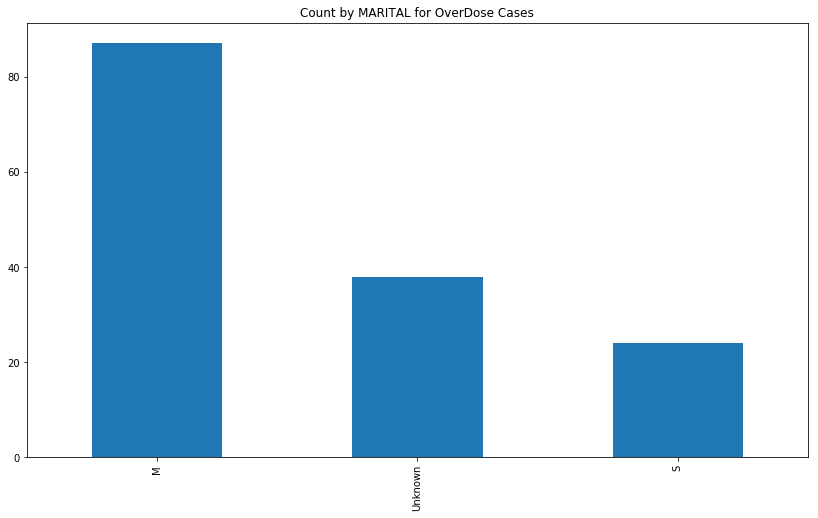

In [33]:
od_df['MARITAL'].value_counts().plot(kind='bar',figsize=(14,8),title="Count by MARITAL for OverDose Cases")

<h2>Analyze OVERDOSE distributon by patient's Gender.</h2>

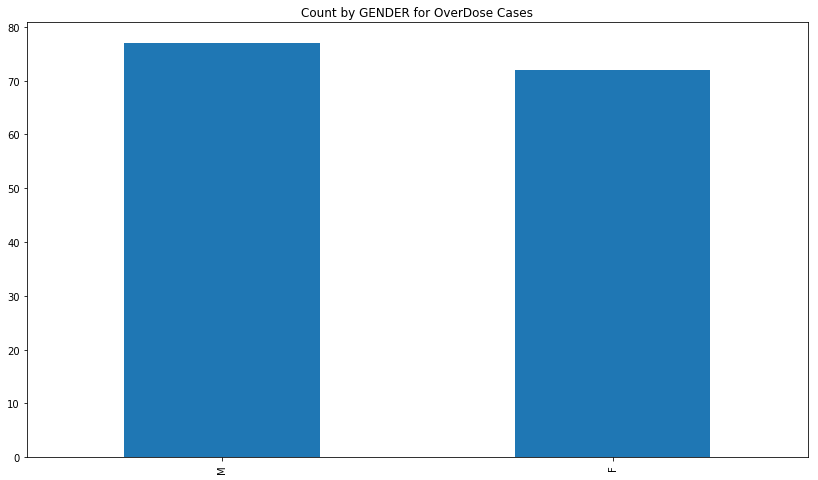

In [34]:
od_df['GENDER'].value_counts().plot(kind='bar',figsize=(14,8),title="Count by GENDER for OverDose Cases")

<h2>Analyze OVERDOSE distributon by prescription for OXYCODONE_HYDROCHLORIDE_15_MG.</h2>

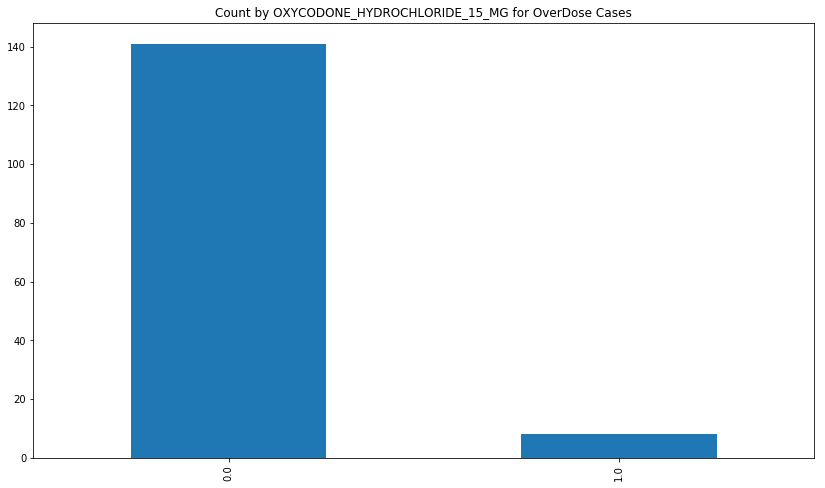

In [35]:
od_df['OXYCODONE_HYDROCHLORIDE_15_MG'].value_counts().plot(kind='bar',figsize=(14,8),title="Count by OXYCODONE_HYDROCHLORIDE_15_MG for OverDose Cases")

<h2>Create new dataframe by dropping columns that are irrelevant for creating the models.</h2>

In [12]:
new_df.columns

Index(['PATIENTID', 'MARITAL', 'RACE', 'GENDER', 'SICKLINESS', 'OPIOD_PRESC',
       'MEPERIDINE_HYDROCHLORIDE_50_MG', 'HYDROCODONE_BITARTRATE_5_MG',
       'HYDROCODONE_BITARTRATE_7POINT5_MG',
       'OXYCODONE_HYDROCHLORIDE_2POINT5_MG', 'OXYCODONE_HYDROCHLORIDE_5_MG',
       'OXYCODONE_HYDROCHLORIDE_5_MG_ORAL', 'OXYCODONE_HYDROCHLORIDE_15_MG',
       'REASONDESCRIPTION', 'DRUGOVERDOSE', 'DOCOUNT'],
      dtype='object')

In [13]:
final_df=new_df[['MARITAL', 'RACE', 'GENDER', 'SICKLINESS', 'OPIOD_PRESC',
       'MEPERIDINE_HYDROCHLORIDE_50_MG', 'HYDROCODONE_BITARTRATE_5_MG',
       'HYDROCODONE_BITARTRATE_7POINT5_MG',
       'OXYCODONE_HYDROCHLORIDE_2POINT5_MG', 'OXYCODONE_HYDROCHLORIDE_5_MG',
       'OXYCODONE_HYDROCHLORIDE_5_MG_ORAL', 'OXYCODONE_HYDROCHLORIDE_15_MG',
       'DRUGOVERDOSE', ]]
final_df.head()

MARITAL      RACE GENDER  SICKLINESS  OPIOD_PRESC  \
0       S     white      F         6.0          1.0   
1       M     white      F         6.0          1.0   
2       M  hispanic      M         6.0          1.0   
3       M  hispanic      F        16.0          1.0   
4       M     white      F         5.0          1.0   

   MEPERIDINE_HYDROCHLORIDE_50_MG  HYDROCODONE_BITARTRATE_5_MG  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             1.0                          0.0   

   HYDROCODONE_BITARTRATE_7POINT5_MG  OXYCODONE_HYDROCHLORIDE_2POINT5_MG  \
0                                1.0                                 0.0   
1                                0.0                                 0.0   
2                                0.0                                 0.0   
3                                0.0                                 0.0   
4                                0.0                                 0.0   

   OXYCODONE_HYDROCHLORIDE_5_MG  OXYCODONE_HYDROCHLORIDE_5_MG_ORAL  \
0                           0.0                                0.0   
1                           0.0                                1.0   
2                           0.0                                1.0   
3                           0.0                                1.0   
4                           0.0                                0.0   

   OXYCODONE_HYDROCHLORIDE_15_MG  DRUGOVERDOSE  
0                            0.0             0  
1                            0.0             0  
2                            0.0             0  
3                            0.0             0  
4                            0.0             0

<h2>Convert categorical to continous values.</h2>

In [14]:
final_df=pd.get_dummies(final_df)
final_df.head()

SICKLINESS  OPIOD_PRESC  MEPERIDINE_HYDROCHLORIDE_50_MG  \
0         6.0          1.0                             0.0   
1         6.0          1.0                             0.0   
2         6.0          1.0                             0.0   
3        16.0          1.0                             0.0   
4         5.0          1.0                             1.0   

   HYDROCODONE_BITARTRATE_5_MG  HYDROCODONE_BITARTRATE_7POINT5_MG  \
0                          0.0                                1.0   
1                          0.0                                0.0   
2                          0.0                                0.0   
3                          0.0                                0.0   
4                          0.0                                0.0   

   OXYCODONE_HYDROCHLORIDE_2POINT5_MG  OXYCODONE_HYDROCHLORIDE_5_MG  \
0                                 0.0                           0.0   
1                                 0.0                           0.0   
2                                 0.0                           0.0   
3                                 0.0                           0.0   
4                                 0.0                           0.0   

   OXYCODONE_HYDROCHLORIDE_5_MG_ORAL  OXYCODONE_HYDROCHLORIDE_15_MG  \
0                                0.0                            0.0   
1                                1.0                            0.0   
2                                1.0                            0.0   
3                                1.0                            0.0   
4                                0.0                            0.0   

   DRUGOVERDOSE  MARITAL_M  MARITAL_S  MARITAL_Unknown  RACE_asian  \
0             0          0          1                0           0   
1             0          1          0                0           0   
2             0          1          0                0           0   
3             0          1          0                0           0   
4             0          1          0                0           0   

   RACE_black  RACE_hispanic  RACE_white  GENDER_F  GENDER_M  
0           0              0           1         1         0  
1           0              0           1         1         0  
2           0              1           0         0         1  
3           0              1           0         1         0  
4           0              0           1         1         0

<h2>Use the Project credentials that was setup at the be<b>gining to save the dataframe as CSV within the Project. This CSV will be used later in the <b> AutoAI</b> experiment </h2>

In [50]:
print(format(project.get_name()))
print(format(project.get_description()))
print(format(project.get_project_bucket_name()))

SMOP
Synthea Mass Opiod Project
smop-donotdelete-pr-sme1nbkfuw1zga


In [51]:
# Save dataframe as csv file to storage
project.save_data(data=final_df.to_csv(index=False,header=True),file_name='FINAL_DF_1F.csv',overwrite=True)

{'file_name': 'FINAL_DF_1F.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'smop-donotdelete-pr-sme1nbkfuw1zga',
 'asset_id': '79509751-d032-4f8a-bfd9-40d69773cb5b'}

<h2>Use Pandas Profiling to profile the final dataframe.</h2>

In [15]:
pandas_profiling.ProfileReport(final_df)

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


<h2>Extract the feature variables and label, split the data in 70:30 ratio for training and testing respectively.</h2>

In [52]:
from sklearn.model_selection import train_test_split
X = final_df.drop(['DRUGOVERDOSE','OPIOD_PRESC'],axis=1)
y = final_df['DRUGOVERDOSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [53]:
X.head()

SICKLINESS  MEPERIDINE_HYDROCHLORIDE_50_MG  HYDROCODONE_BITARTRATE_5_MG  \
0        17.0                             0.0                          0.0   
1         8.0                             2.0                          0.0   
2        11.0                             0.0                          0.0   
3        19.0                             0.0                          0.0   
4        11.0                             0.0                          0.0   

   HYDROCODONE_BITARTRATE_7POINT5_MG  OXYCODONE_HYDROCHLORIDE_2POINT5_MG  \
0                                0.0                                 0.0   
1                                0.0                                 0.0   
2                                0.0                                 0.0   
3                                2.0                                 0.0   
4                                2.0                                 0.0   

   OXYCODONE_HYDROCHLORIDE_5_MG  OXYCODONE_HYDROCHLORIDE_5_MG_ORAL  \
0                           0.0                                3.0   
1                           0.0                                0.0   
2                           0.0                                2.0   
3                           0.0                                0.0   
4                           0.0                                0.0   

   OXYCODONE_HYDROCHLORIDE_15_MG  MARITAL_M  MARITAL_S  MARITAL_Unknown  \
0                            0.0          1          0                0   
1                            0.0          1          0                0   
2                            0.0          0          1                0   
3                            0.0          1          0                0   
4                            0.0          1          0                0   

   RACE_asian  RACE_black  RACE_hispanic  RACE_white  GENDER_F  GENDER_M  
0           0           0              0           1         1         0  
1           0           0              1           0         1         0  
2           0           0              0           1         0         1  
3           0           0              0           1         1         0  
4           0           0              0           1         0         1

In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: DRUGOVERDOSE, dtype: int64

<h2>Run the RandomForest Classifier training using default hyper parameters and create the model.</h2>

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<h2>Predict on the test set.</h2>

In [56]:
predictions = rfc.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2379
           1       0.31      0.21      0.25        43

   micro avg       0.98      0.98      0.98      2422
   macro avg       0.65      0.60      0.62      2422
weighted avg       0.97      0.98      0.98      2422



<h2>Print the confusion matrix.</h2>

In [58]:
print(confusion_matrix(y_test,predictions))

[[2359   20]
 [  34    9]]


In [59]:
import pandas as pd
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
SICKLINESS                          6.858977e-01
GENDER_M                            3.625404e-02
GENDER_F                            3.538235e-02
MARITAL_Unknown                     3.134417e-02
MARITAL_M                           2.864698e-02
OXYCODONE_HYDROCHLORIDE_5_MG_ORAL   2.355947e-02
HYDROCODONE_BITARTRATE_7POINT5_MG   2.248739e-02
MEPERIDINE_HYDROCHLORIDE_50_MG      2.191900e-02
MARITAL_S                           2.034807e-02
RACE_white                          1.736798e-02
RACE_black                          1.618300e-02
OXYCODONE_HYDROCHLORIDE_5_MG        1.486492e-02
OXYCODONE_HYDROCHLORIDE_15_MG       1.409803e-02
RACE_hispanic                       1.152368e-02
RACE_asian                          1.127378e-02
HYDROCODONE_BITARTRATE_5_MG         8.849219e-03
OXYCODONE_HYDROCHLORIDE_2POINT5_MG  1.958963e-07

<h1>Pretty evident from the above that the model is not that accurate. Most of the prediction are for No Overdose and the primary reason seems to be the <b>Skew </b> in the dataset.</h1>

<h2>Run the XGBoost Classifier training using default hyper parameters and create the model.</h2>

In [60]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix

In [61]:
print( X_test.shape)
print ( y_test.shape)

(2422, 17)
(2422,)


In [62]:
clf = xgb.XGBClassifier(max_depth=7, min_child_weight=1, learning_rate=0.05, n_estimators=10, silent=True,objective='binary:logistic', gamma=0, max_delta_step=0, subsample=1,colsample_bytree=1,colsample_bylevel=1,
 reg_alpha=0,  reg_lambda=0, scale_pos_weight=1,    seed=1,   missing=None)
clf.fit(X_train, y_train, eval_metric='logloss', verbose=True, eval_set=[(X_test, y_test)], early_stopping_rounds=10)
clf

[0]	validation_0-logloss:0.647569
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.606346
[2]	validation_0-logloss:0.568908
[3]	validation_0-logloss:0.53473
[4]	validation_0-logloss:0.503506
[5]	validation_0-logloss:0.47479
[6]	validation_0-logloss:0.448397
[7]	validation_0-logloss:0.424021
[8]	validation_0-logloss:0.401491
[9]	validation_0-logloss:0.38057


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=1, silent=True,
       subsample=1)

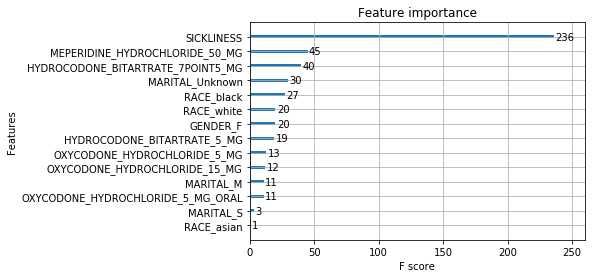

In [63]:
from xgboost import plot_importance
plot_importance(clf)

In [64]:
predictions = clf.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2379
           1       0.36      0.12      0.18        43

   micro avg       0.98      0.98      0.98      2422
   macro avg       0.67      0.56      0.58      2422
weighted avg       0.97      0.98      0.98      2422



In [66]:
print(confusion_matrix(y_test,predictions))

[[2370    9]
 [  38    5]]


<h1>Again evident from the above that the model is not accurate. Similar to the RandomForest Classifier, most of the prediction are for No Overdose. The skew in the dataset is surely playing an important role in the accuracy.</h1>

<h2>Try RandomForest Classifier with 1000 trees to see if anything changes.</h2>

In [67]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2379
           1       0.32      0.21      0.25        43

   micro avg       0.98      0.98      0.98      2422
   macro avg       0.65      0.60      0.62      2422
weighted avg       0.97      0.98      0.98      2422

[[2360   19]
 [  34    9]]


<h1>No much change in the model accuracy</h1>